# The Sparks Foundation Data Science & Business Analytics

## Task #2 : Prediction using Unsupervised ML (k-Means)



### By: Prithvi S Shetty

In [84]:
# Importing necessary packages
import numpy as np    # arthmetic calculations
import pandas as pd # 

data =pd.read_csv('Iris.csv') 

In [85]:
data.drop("Id",axis=1,inplace=True)   # dropping unnecessary columns
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
# data.isna().sum()     #checking null values : This dataset does not contain null values

In [87]:
# Importing packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# Here we have 3 records of SepalLength in Cm, SepalWidth in Cm, PetalLength in Cm, PetalWidth in Cm.
# of the for each species of living plants.
#Here we have 3 types of species 1. Setosa , 2. Virginica , 3. versicolor
#data['Species'].value_counts() #Gives you the total count of each type of species
#Here we have 50 records per category.

In [89]:
# Cleaning the data
data['Species']=data['Species'].str.replace("Iris-",'')   #removing 1st 5 characters

In [90]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


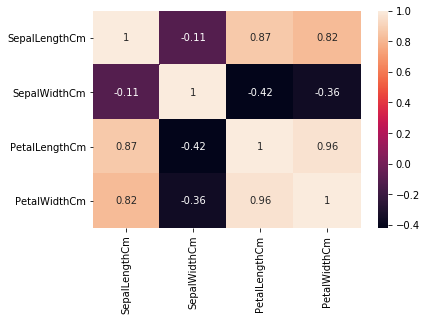

In [91]:
# Finding the correlation between each numercial attributes using heat map
corr = data.corr()                              
sns.heatmap(corr, annot=True)   
                                     # PetalLength & PetalWidth is highly correlated.
                                            #   Sepalwidth is negatively correlated 
                                            # Sepallength is postively correlated among
                                                                #  PetalLength & PetalWidth.

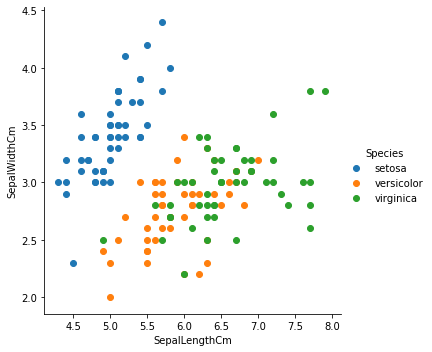

In [92]:
sns.FacetGrid(data, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

## From the above figure you can see that the distribution/spread of data points with regards to SepalLengthCm, SepalWidthCm. 

#### We can observe that of sepal length setosa ranges from 0 - 5.6 cm and sepal width ranges 1.6 - 4.5cm
#### Similary, you can categorize by comparing the attriutes of each species.


## Going on you can find similar comparission between different attributes.

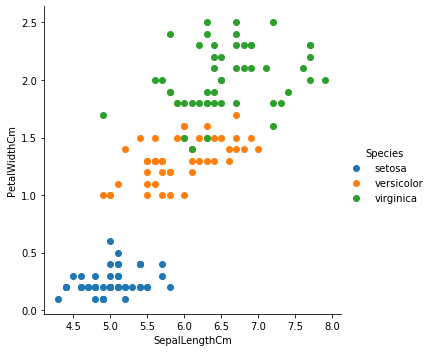

In [93]:
sns.FacetGrid(data, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "PetalWidthCm").add_legend()


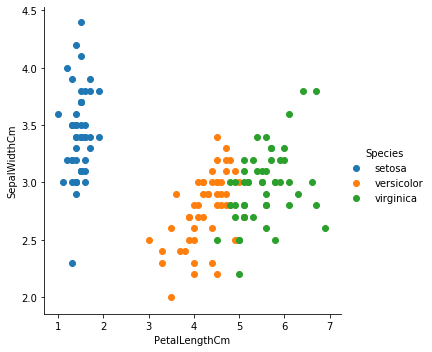

In [94]:
sns.FacetGrid(data, hue="Species", size=5).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()


## Unspurevised machine learning 

### Bascially means that the data is not labelled or in a structred format. By applying kmean clustering method we will train the model and predict the test case. Assuming that the Species column is not avaiable. 

### elbow method ->  find out the number of clusters. 

In [95]:
from sklearn.cluster import KMeans   # Importing unsupervised model

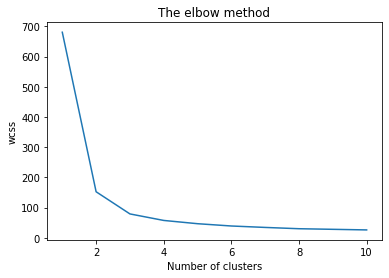

In [96]:
#Finding the  number of clusters for k-means 
from sklearn.cluster import KMeans
wcss = []    # creating a list to store within cluster sum of sqaures.

for i in range(1, 11):     # Assuming that we don't have the target variable
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Line grahp to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss') #within cluster sum of squares
plt.show()

### Here you can see that there is slight deviation between the range 0-3, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

In [97]:
# Standardize the data 
#K_Means is effected by the scale so you need to scale the features in the data before using K-Means.
# You can transform the data onto unit scale(mean =0 and variance =1 )for better performance.
from sklearn.preprocessing import StandardScaler
x1= data.drop(['Species','SepalLengthCm','SepalWidthCm'],axis=1)
y1= data['Species']

In [98]:
x_1= x1.values
x_1 = StandardScaler().fit_transform(x_1)

In [99]:
kmeans= KMeans(n_clusters=3, random_state=1) # as we already know that there are 3 clusters
kmeans.fit(x_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [100]:
labels= kmeans.labels_
centroids= kmeans.cluster_centers_

In [101]:
x_1= pd.DataFrame(x_1)
x_1.columns = ['PetalLengthCm','PetalWidthCm']

Text(0, 0.5, 'Petal Width (CM)')

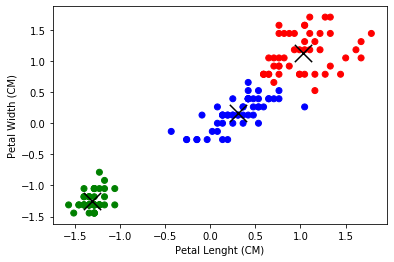

In [102]:
colormap= np.array(['r','g','b'])
plt.scatter(x_1['PetalLengthCm'],x_1['PetalWidthCm'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s=300, marker = 'x', c = 'k')
plt.xlabel("Petal Lenght (CM)")
plt.ylabel("Petal Width (CM)")

## From the above scatter plot you can see that the the centroids marked as x and here we have classified 3 different labels, you can now classify/predict the labels by providing the petal width and petal length
